In [14]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
import pandas as pd
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import plotly.express as px
#import plotly.graph_objects as go

### Interactive Scatter Plot of RecBCD activity

In [42]:
graph = pd.read_csv('ORBIT RecBCD.csv')

#This grabs the data from the csv file from index 800 to 900
x2 = graph.iloc[800:901,0]
y2 = graph.iloc[800:901,1]
z2 = graph.iloc[800:901,2] 

#This will graph the entire data set if you add '#' to each of the varaibles above and delete '#' from each of the variables below
#x2 = graph.iloc[:,0]
#y2 = graph.iloc[:,1]
#z2 = graph.iloc[:,2]

#To use plotly interactive graphs, we must store the data as a dataframe within python
df = pd.DataFrame({'Movement on x':x2, 'Movement on y':y2, 'Time (ms)':z2})
df.head()

fig = px.scatter_3d(df, x='Movement on x', y='Movement on y', z='Time (ms)',color = 'Time (ms)', color_continuous_scale=px.colors.sequential.Plasma, title="RecBCD Activity")
fig.show()



### Line plot of RecBCD activity (work in progress to make interactive)


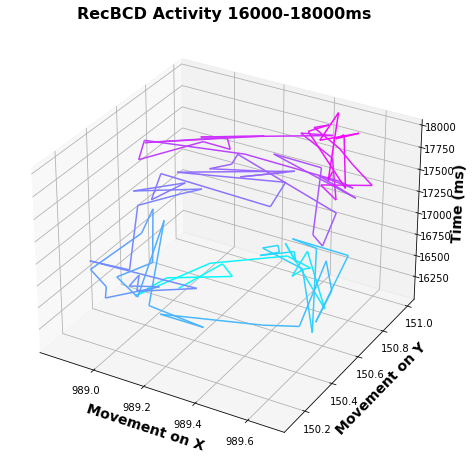

In [40]:
# code curtesy of https://stackoverflow.com/questions/10252412/matplotlib-varying-color-of-line-to-capture-natural-time-parameterization-in-da
# and https://stackoverflow.com/questions/38079366/matplotlib-line3dcollection-multicolored-line-edges-are-jagged

graph = pd.read_csv('ORBIT RecBCD.csv')

x4 = graph.iloc[800:901,0]
y4 = graph.iloc[800:901,1]
z4 = graph.iloc[800:901,2]



points = np.array([x4,y4,z4]).transpose().reshape(-1,1,3)


segs = np.concatenate([points[:-1],points[1:]],axis=1)


lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
lc.set_array(z4)


fig=plt.figure(figsize = (8,8))
ax4 = fig.gca(projection = '3d')
ax4.set_zlim(min(z4), max(z4))
ax4.set_xlim(min(x4),max(x4))
ax4.set_ylim(min(y4),max(y4))
ax4.add_collection3d(lc, zs=z4, zdir='z')
plt.title('RecBCD Activity 16000-18000ms', fontweight = 'bold', fontsize= 16)
ax4.set_xlabel(' Movement on X', fontweight = 'bold', fontsize = 14)
ax4.set_ylabel(' Movement on Y', fontweight = 'bold', fontsize = 14)
ax4.set_zlabel(' Time (ms)', fontweight= 'bold' , fontsize =14)




plt.savefig('RecBCD_Origami_spinning_rotor_tip_16000-18000ms',dpi=300)

plt.show()